## Латиков Александр, задача 16

Задача - необходимо решить эллиптический диффур

d2u/dx2 + d2u/dy2 = 0

0<x<1 0<y<1

u(x = 0) = 1

u(x = 1) = 3

u(y = 1) = 2

u(y = 0) = 4

In [34]:
import numpy as np              
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [35]:
ux0 = 1
ux1 = 3
uy0 = 4
uy1 = 2

In [36]:
Nx = 100
Ny = 100
hx = 1.0 / Nx
hy = 1.0 / Ny
eps = 0.0001

In [37]:
def pr_solve(A, f):
    n = f.size
    y = np.zeros(n, dtype = float)
    a = np.zeros(n, dtype = float)
    b = np.zeros(n, dtype = float)
    
    a[0] = A[0][0]
    b[0] = f[0]
    for i in range(1, n):
        a[i] = A[i][i] - A[i][i - 1] / a[i - 1] * A[i - 1][i]
        b[i] = f[i] - A[i][i - 1] / a[i - 1] * b[i - 1]
        
    y[n - 1] = b[n - 1] / a[n - 1]
    for i in range(1, n):
        j = n - 1 - i
        y[j] = (b[j] - A[j][j + 1] * y[j + 1]) / a[j]
        
    return y

In [38]:
A = np.array([[1.0, 1.0, 0], [1.0, 2.0, 1.0], [0, 1.0, 2.0]])
f = np.array([2.0, 4.0, 3.0])

y = pr_solve(A, f)
print(y)

[1. 1. 1.]


In [39]:
def data_templ():
    data = np.ones(Nx * Ny, dtype = float).reshape(Ny, Nx)
    data[0][0] = (ux0 + uy0) / 2
    data[0][Nx - 1] = (ux1 + uy0) / 2
    data[Ny - 1][0] = (ux0 + uy1) / 2
    data[Ny - 1][Nx - 1] = (ux1 + uy1) / 2
    for i in range(1, Nx - 1):
        data[0][i] = uy0
        data[Ny - 1][i] = uy1
    for i in range(1, Ny - 1):
        data[i][0] = ux0
        data[i][Nx - 1] = ux1  
    return data

## Метод Якоби

In [40]:
def Yakobi_iter(data):
    data_new = data_templ()
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            data_new[i][j] = ((data[i][j - 1] + data[i][j + 1]) / (hx**2) + (data[i - 1][j] + data[i + 1][j]) / (hy**2)) / (2 * (1 / (hx**2) + 1 / (hy**2)))
    return data_new

def diff(data1, data2):
    d = 0.0
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            e = abs(data1[i][j] - data2[i][j])
            if e > d:
                d = e
    return d

In [41]:
data = data_templ()
data_new = data_templ()

d = 1.0
it_count = 0
while(d > eps):
    data_new = Yakobi_iter(data)
    d = diff(data, data_new)
    data, data_new = data_new, data
    it_count += 1
print(it_count)

4977


<IPython.core.display.Javascript object>


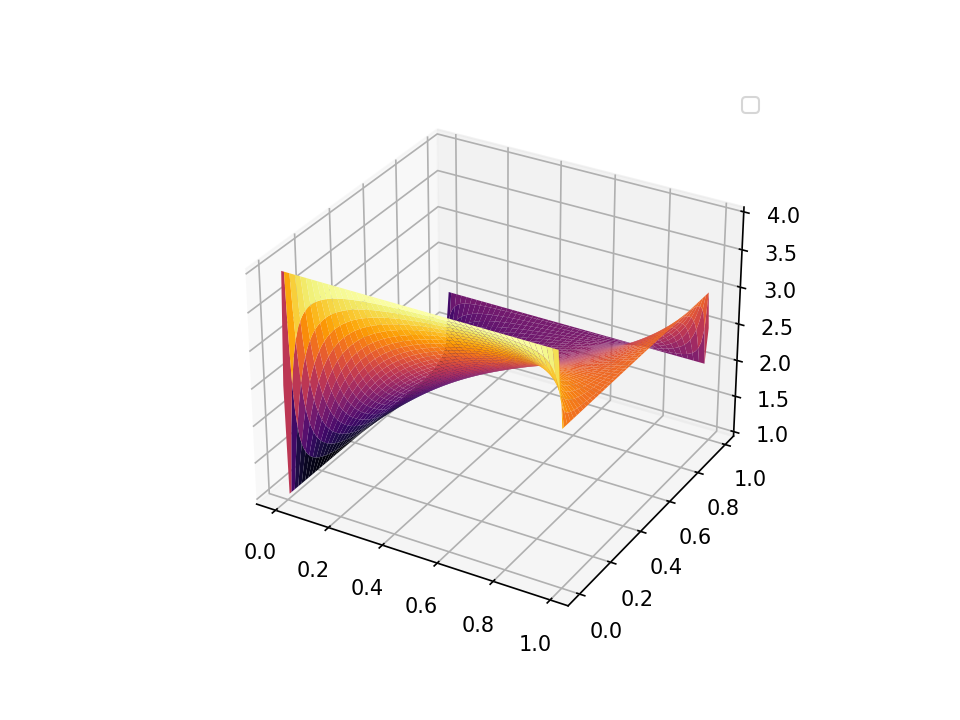

No handles with labels found to put in legend.


In [42]:
x = np.ones(Nx * Ny, dtype = float).reshape(Ny, Nx)
y = np.ones(Nx * Ny, dtype = float).reshape(Ny, Nx)

for i in range(Ny):
    for j in range(Nx):
        x[i][j] = j * hx
        y[i][j] = i * hy


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, data, cmap='inferno')
ax.legend()

## Метод Зейделя (верхней релаксации с tau = 1)

In [43]:
def relax_iter(data, tau):
    data_new = data_templ()
    k = 2 * (1 / (hx**2) + 1 / (hy**2))
    for i in range(1, Ny - 1):
        for j in range(1, Nx - 1):
            data_new[i][j] = ((data_new[i][j - 1] + data[i][j + 1]) / (hx**2) + (data_new[i - 1][j] + data[i + 1][j]) / (hy**2) - data[i][j] * k * (1 - 1 / tau)) / (k / tau)
    return data_new

In [44]:
data = data_templ()
data_new = data_templ()

d = 1.0
it_count = 0
while(d > eps):
    data_new = relax_iter(data, 1)
    d = diff(data, data_new)
    data, data_new = data_new, data
    it_count += 1
print(it_count)

3177


<IPython.core.display.Javascript object>


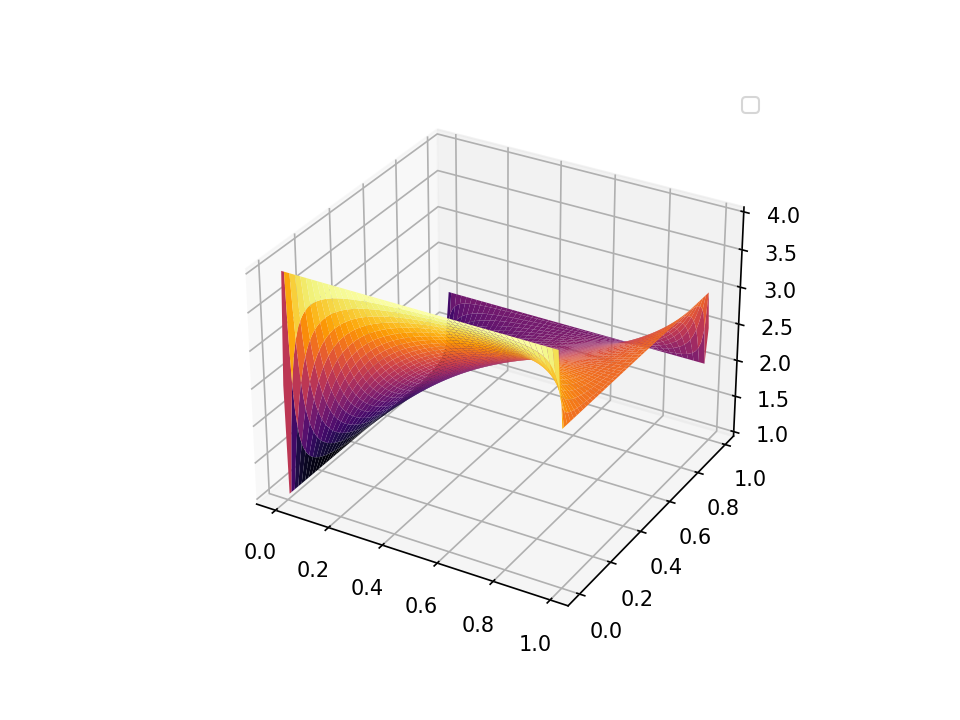

No handles with labels found to put in legend.


In [45]:
x = np.ones(Nx * Ny, dtype = float).reshape(Ny, Nx)
y = np.ones(Nx * Ny, dtype = float).reshape(Ny, Nx)

for i in range(Ny):
    for j in range(Nx):
        x[i][j] = j * hx
        y[i][j] = i * hy


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, data, cmap='inferno')
ax.legend()

## Метод релаксации с tau = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9}

In [46]:
for tau in range(1, 10):
    data = data_templ()
    data_new = data_templ()

    d = 1.0
    it_count = 0
    while(d > eps):
        data_new = relax_iter(data, tau * 0.1)
        d = diff(data, data_new)
        data, data_new = data_new, data
        it_count += 1
    print(tau, it_count)

1 9116
2 9229
3 8303
4 7218
5 6263
6 5451
7 4759
8 4161
9 3639


Количество итераций до схождения от tau:

<IPython.core.display.Javascript object>


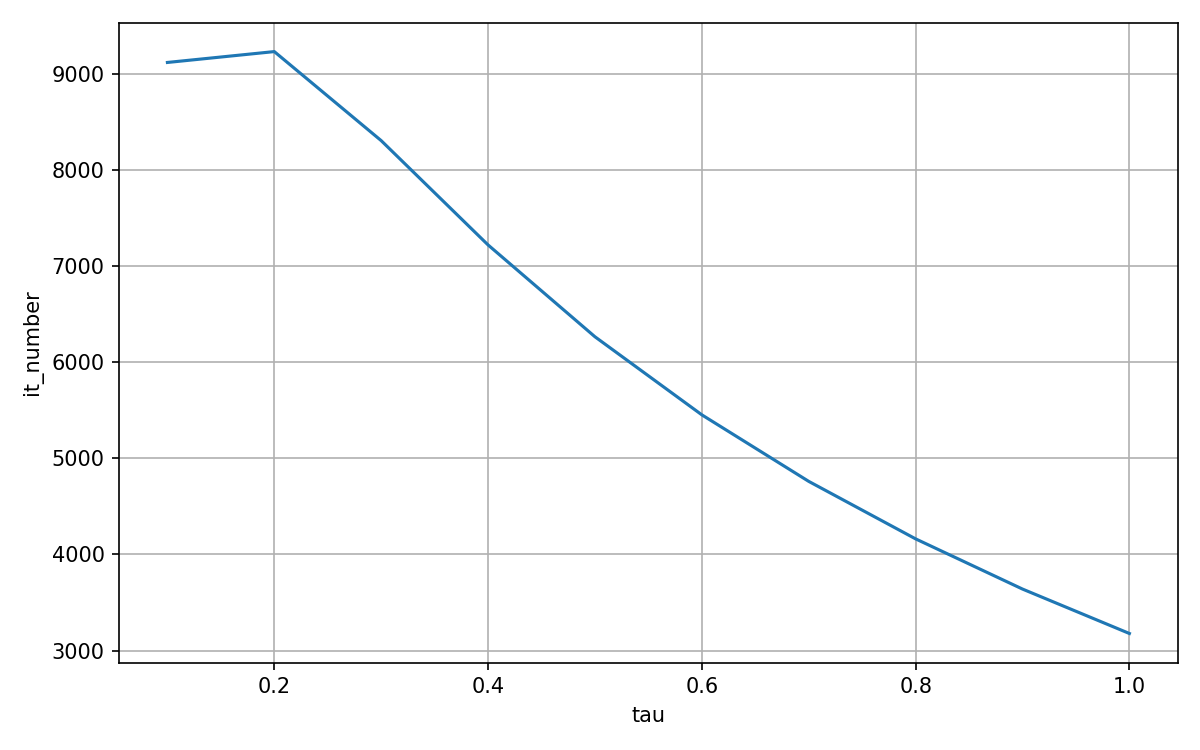

In [48]:
x = np.linspace(0.1, 1, 10)
y = np.array([9116, 9229, 8303, 7218, 6263, 5451, 4759, 4161, 3639, 3177])

plt.figure(figsize = [8, 5])
plt.plot(x, y)
plt.xlabel("tau")
plt.ylabel("it_number")
plt.tight_layout() 
plt.grid()
plt.show()